# Linear Models Recap (GLM week)

In Biology, it is impossible to study all members of a given species. There is also a fair amount of 'noise' in our data- dealing with living things is often messy and volunerable to error. 

Models are used to make predictions about a population at large from a sample of that population.

## Distributions

Models are used to describe *distributions* of data in terms of their **Centrality** (mean, median, mode) and **Spread** (range, variance, standard distribution. 

**Normally distributed** data organises symetrically around the mean in the shape of a bell curve. In the case of normally distributed data, the mean, median and mode will be fairly similar if not identical.

**Variance** describes how much the observed data varies from the mean. It is the average of squared differences between data points and the mean. That is, substracting each data point from the mean, squaring it and taking an average of these values. 
$$
\sigma^2
$$
Variance is squared to keep the values positive, thus more functional when using positive and negative axis.

**Standard Deviation** is the square root of variance. 
$$
\sigma
$$


## Z-score & Quantiles
**Z-scores**come from a standardized normal distribution that has a mean of 0 and a standard distribution of 1. In stats, it is often useful to standardize data uin this way, using the following:
$$
z\equiv\frac{y-\overline{y}}{\sigma y}
$$
**qnorm()** then gives you the value at a given quantile, and 

**pnorm()** gives the probability at a given quantile
These are important for hypothesis testing, using the last quantiles on either side. 

The **95% confidence interval (CI)** is the range of values that encompass 95% of the population. We are looking for values with 5% or less chance of error.  

## Data types
Data can be categorical or continuous.

**Categorical data** is data that comes in discrete groups or categories, such as hair and eye colour. 

Meanwhile, **Continuous data** is data that builds on one another continuously- measurements or numbers in which the differences between data points mean something. 

## Precision & Standard Error
**Standard Error** displays uncertainty in a data set.
$$
se\equiv\sqrt{\frac{s^2}{n}}
$$
Where n = total numbers in the data (sample size).

As you can see, standard error is directly related to the sample size. 
$$
se\equiv\sqrt{\frac{s^2}{n}}\equiv\frac{s}{\sqrt{n}}
$$
Standard error also used to calculate **95% Confidence Interval**: 
$$
CI\equiv\overline{x}\pm z \frac{s}{sqrt{n}}
$$
Where *x* = sample mean

*z* = confidence level 

*s* = sample standard deviation

*n* = sample size

## Statistical Power
**Effect size** tells us the probability to detecting an effect if there isa  true effect present. For example, effect size is important in pyschology, when comparing the difference between test and control groups. 
*Cohen's D:*
$$
d\equiv\frac{m1-m2}{\sigma}
$$
Where *d* = effect size

*m1* = mean of group one

*m2* = mean of group two

A d of '1' means groups differ by 1 sd, 2, by 2 std etc.

##  Linear Models
Simple linear equation: 
$$
y\equiv a + bx
$$
Where *a* = the intercept
and *b* is the slope of a line. 

Linear model: 
$$
y_{i}\equiv b_{0}+b_1 x_i +\epsilon_{i}
$$
**Error (e)**, tells us how far each point is from the line. **Model error** is the sum of these squared residuals.
$$
\Sigma(\epsilon^2)
$$
In model fitting, the aim is to solve for b0 and b1 that minimises the sum of squared residuals (error).

In R, we can use the command lm() to fit a linear model:

                            summary(lm(y ~ x))

### Fitting Linear models with one predictor
For a linear model with one predictor (explanatory variable), we can use the **"least squares"** method - looking for the line with the smallest squares of error: 
$$
\Sigma y_{i}-\overline{y_{i}}
$$
Using lm(), the **R-squared** value tells us what percentage fo the variance is explained by variance in our explanatory variable.

**Ex:** In the sparrow size data, an R-squared value of 0.2336 means 23% of variance in mass is explained by variance in Tarsus. If there value was 1, the line would be perfectly fit. 

### Variance and Covariance 
**Variance** is the sum of all deviations from the mean, **covariance** is a measure of the directional relationship between two variables, where their association can be positive, negative, or have no association. 
$$
Covar(x_i, y_i)\equiv\frac{\Sigma((x_i-\overline{x}) * (y_i - \overline{y}))}{n-1}
$$
**Correlation Coefficient** standardizes data and gauges the strength of association (covariance) on a scale from -1 to 1, where 0 is no association.
$$
Cor(x, y)\equiv\frac{1}{n-1}*\frac{\Sigma((x_i-\overline{x})*(y_i-\overline{y}))}{\Sigma(x_i-\overline{x})^2*\Sigma(y_i-\overline{y})^2}
$$
Standardised values thus work without units, so correlation coefficient is comparable across different data sets. 

## Regression Analysis 
Regression analysis is a set of statistical procedures used to evaluate the relationship between a given dependent and explanatory variable. 

**"Homogenity"** and **"Heterogenity"** are used to describe properties of a data set- whether the statistical properties of any one part of the data set are the same as any other parts. 

Heterogenity means that your sample populations or results are different, meanwhile homogenity means they are the same/ A heteogenous population is one where every member has a different value for the characteristic youre interested in.

### Six point checklist for Regression analysis
Going to use the SparrowSize.txt example:

In [7]:
d <- read.table("../data/SparrowSize.txt", header = TRUE)
d

BirdID,Cohort,CaptureDate,CaptureTime,Year,Tarsus,Bill,Wing,Mass,Sex,Sex.1
<int>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>
4401,1991,21-Jun-00,NA,2000,18.9,NA,82,29.4,1,male
4401,1991,02-Oct-00,NA,2000,18.8,NA,79,31.6,1,male
4405,1994,20-Jun-00,NA,2000,19.1,NA,77,29.9,0,female
4405,1994,04-Oct-00,NA,2000,19.0,NA,78,31.6,0,female
4405,1994,07-Oct-00,NA,2000,19.1,NA,77,31.0,0,female
4409,1994,23-Mar-00,NA,2000,18.0,NA,76,28.1,1,male
4409,1994,14-Aug-00,NA,2000,17.9,NA,76,26.9,1,male
4409,1994,02-Oct-00,NA,2000,17.5,NA,73,29.6,1,male
4409,1994,13-Apr-01,NA,2001,18.3,NA,79,26.8,1,male


#### 1. Check for outliers
See if any data points stand out of the norm using a boxplot, removing only those that are biologically infeasible (and later justifying their removal in the write up). The data below looks okay, no outliers.

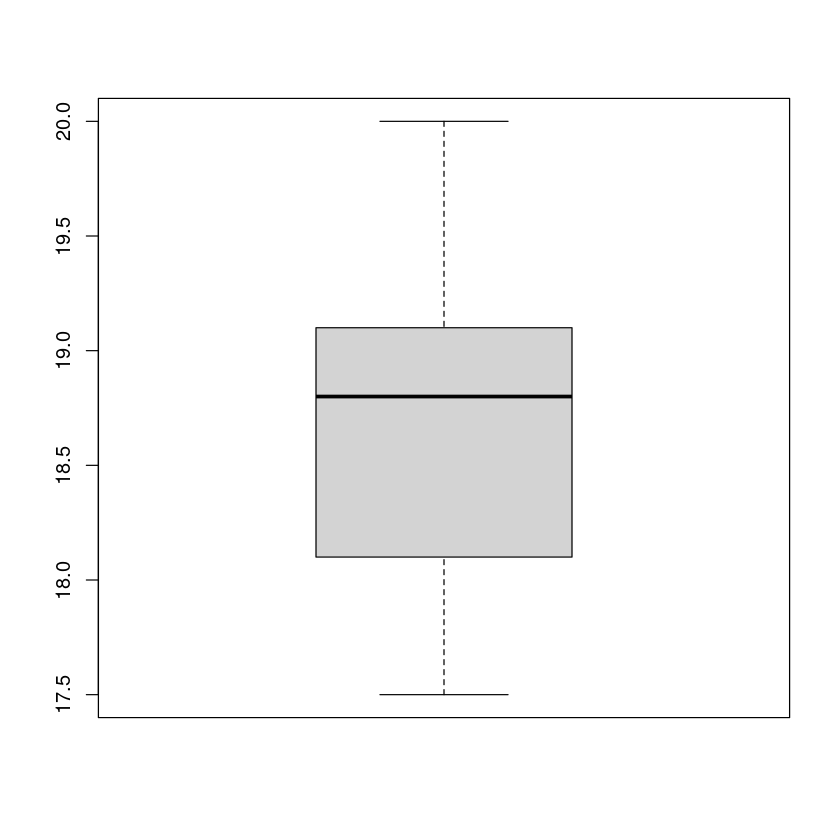

In [8]:
boxplot(d$Tarsus)

#### 2. Homogenity of variances
Regression analysis assumes our x values are normally distributed. As a rule of thumb, the ratio between smallest and largest variance should be less than 4 (though this depends on which kind of tests you're interesting in running).

#### 3. Is the data normally distributed? 
Linear regression assumes normality for each variable (though this is fairly robust agaisnt violations). Plot a histogram to see distribution of data.

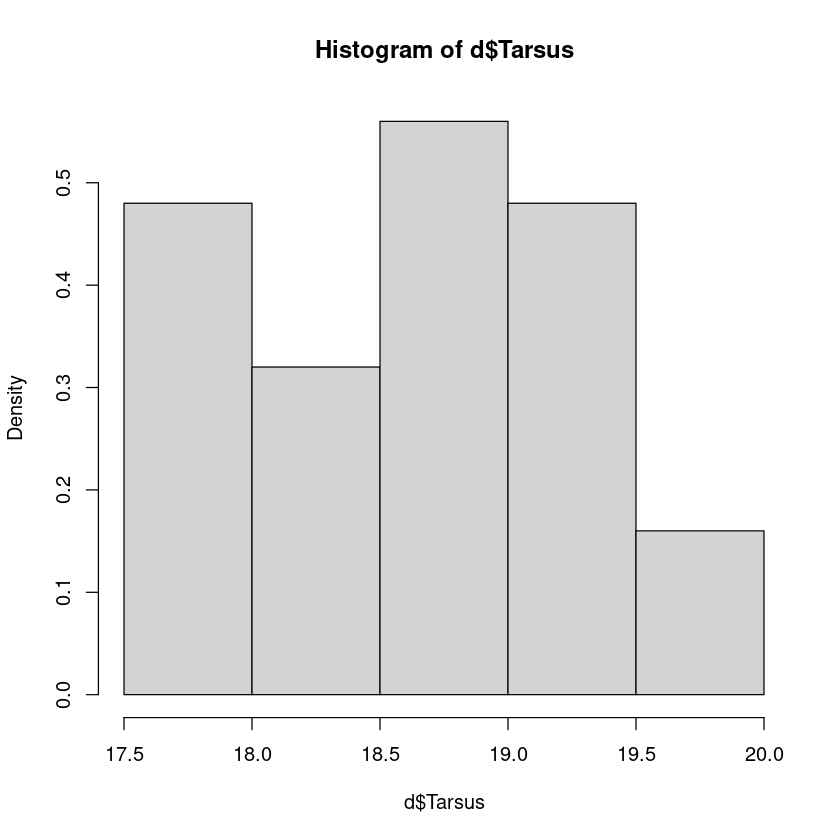

In [10]:
hist(d$Tarsus)

 We might instead plot the desnity at which different Tarsus are measured. This gives us probablistic distribution of Tarsus size- not what we observed (in terms of frequencies), but the probability, based on our observed data, that we would measure any x tarsus length from the population.

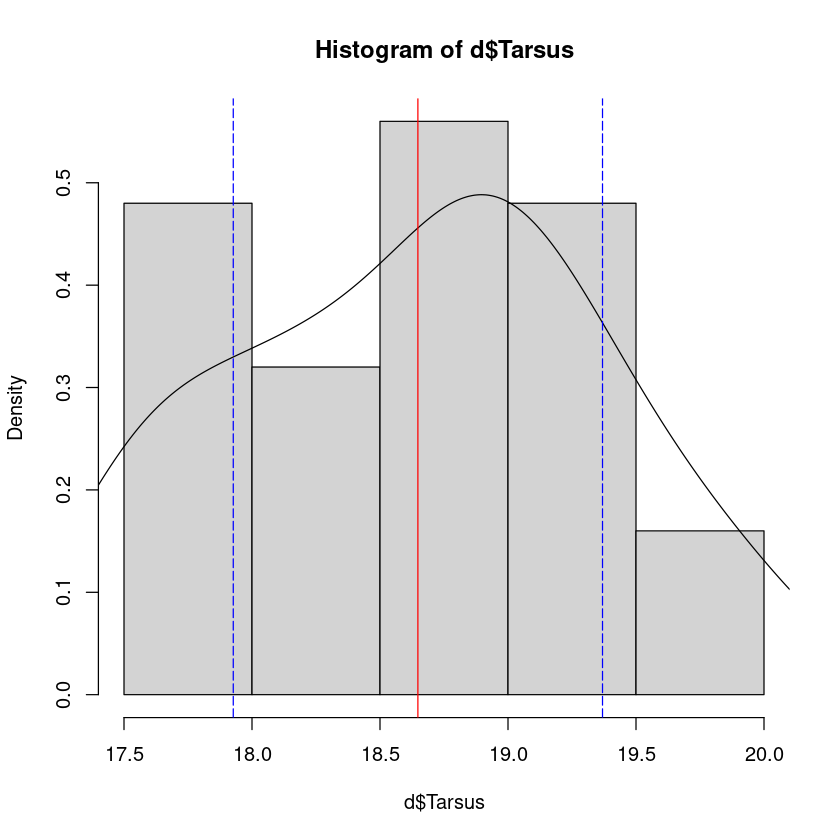

In [13]:
hist(d$Tarsus, prob = TRUE)
lines(density(d$Tarsus))
abline(v = mean(d$Tarsus), col = "red") ## Plot mean
abline(v = mean(d$Tarsus) - sd(d$Tarsus), col = "blue", lty=5) ## First quartile
abline(v = mean(d$Tarsus) + sd(d$Tarsus), col = "blue", lty=5)

Notice here the data is not normally distributed... there is another prong in the lower end of Tarsus that rivals the mean. Most likely there is some other explanatory variable influencing spread of data- perhaps a categorical one... One likely explanation is sexual dimorphism in Tarsus length- Females may have shorter Tarsus than males.

Can test for a difference in means between the two categories using a **t-test**

In [15]:
t.test(d$Tarsus~d$Sex)


	Welch Two Sample t-test

data:  d$Tarsus by d$Sex
t = 0.15436, df = 4.2347, p-value = 0.8844
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -1.027638  1.151449
sample estimates:
mean in group 0 mean in group 1 
        18.7000         18.6381 


Results point to a difference between Tarsus in males and females. Now we can plot Tarsus length for each group:

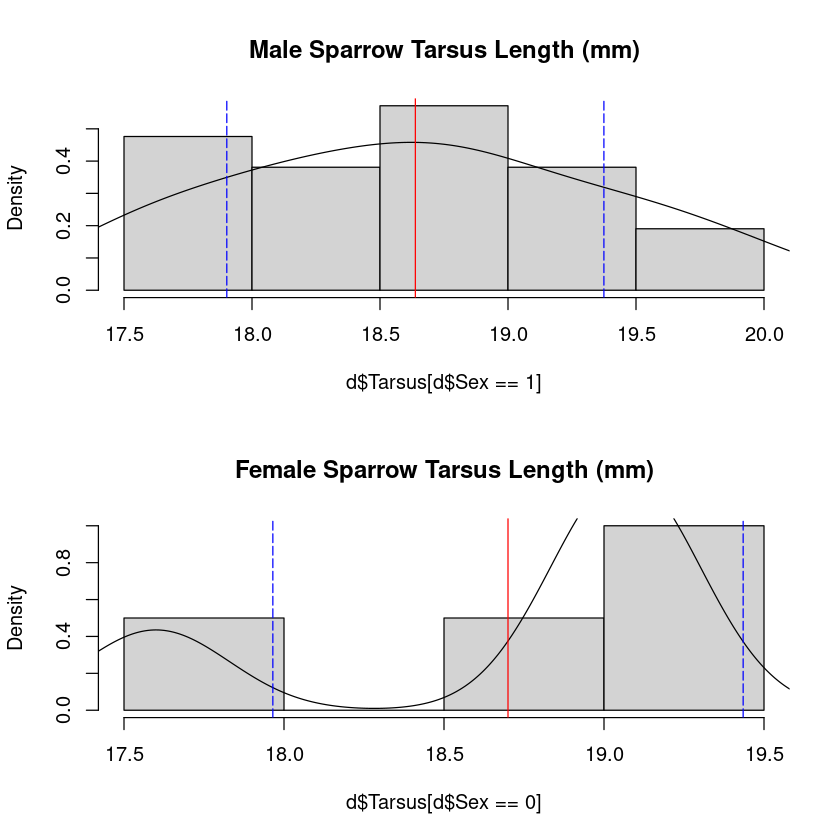

In [22]:
par(mfrow=c(2,1))
hist(d$Tarsus[d$Sex==1], main = "Male Sparrow Tarsus Length (mm)", prob = TRUE)
lines(density(d$Tarsus[d$Sex==1]))
abline(v = mean(d$Tarsus[d$Sex==1]), col = "red")
abline(v = mean(d$Tarsus[d$Sex==1]) - sd(d$Tarsus[d$Sex==1]), col = "blue", lty = 5)
abline(v = mean(d$Tarsus[d$Sex==1]) + sd(d$Tarsus[d$Sex==1]), col = "blue", lty = 5)

hist(d$Tarsus[d$Sex==0], main = "Female Sparrow Tarsus Length (mm)", prob = TRUE)
lines(density(d$Tarsus[d$Sex==0]))
abline(v = mean(d$Tarsus[d$Sex==0]), col = "red")
abline(v = mean(d$Tarsus[d$Sex==0]) - sd(d$Tarsus[d$Sex==0]), col = "blue", lty = 5)
abline(v = mean(d$Tarsus[d$Sex==0]) + sd(d$Tarsus[d$Sex==0]), col = "blue", lty = 5)

Strangely, the two-prongs still exists in the female data.. this could be down to a number of reasons from sampling errors to another heterogenity. 

#### 4. Check for zeros
Are there excessively many zeros? This is most evident in a histogram, and there don't seem to be any zeros in our data set.

#### 3. Is there collinearity amoung covariates? 
